In [ ]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [25]:
train = pd.read_csv('train.csv')
train = train.select_dtypes(include=[np.number])
#train = pd.get_dummies(data=train, drop_first=True)
print(train.shape)
print(train.head())

(1460, 38)
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  

In [62]:
test = pd.read_csv('test.csv')
print(test["MSSubClass"])
test = test.select_dtypes(include=[np.number])
#test = pd.get_dummies(data=test, drop_first=True)
print(test.shape)
print(test.head())
test

0       20
1       30
2       20
3       90
4      120
      ... 
455     60
456     20
457     70
458     20
459     20
Name: MSSubClass, Length: 460, dtype: int64
(460, 37)
     Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1001          20         74.0    10206            3            3   
1  1002          30         60.0     5400            5            6   
2  1003          20         75.0    11957            8            5   
3  1004          90          NaN    11500            5            6   
4  1005         120         43.0     3182            7            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
0       1952          1952         0.0           0  ...         528   
1       1920          1950         0.0           0  ...         216   
2       2006          2006        53.0          24  ...         824   
3       1976          1976       164.0           0  ...         528   
4       2005          2006        16.0     

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1001,20,74.0,10206,3,3,1952,1952,0.0,0,...,528,0,0,0,0,0,0,0,7,2009
1,1002,30,60.0,5400,5,6,1920,1950,0.0,0,...,216,0,20,94,0,0,0,0,1,2007
2,1003,20,75.0,11957,8,5,2006,2006,53.0,24,...,824,144,104,0,0,0,0,0,7,2008
3,1004,90,NaN,11500,5,6,1976,1976,164.0,0,...,528,0,0,0,0,0,0,0,6,2007
4,1005,120,43.0,3182,7,5,2005,2006,16.0,16,...,457,156,0,0,0,0,0,0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


# New Section

In [63]:
# investigate Sale Price
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

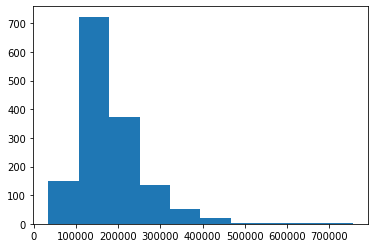

In [64]:
# plot hist
plt.hist(train['SalePrice'])

In [68]:
corr = train.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:3].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea'], dtype='object')

In [69]:
# pick out X cols and Y = SalePricee
X_train = train[['OverallQual', 'GrLivArea']]
Y_train = train['SalePrice']
X_test = test[['OverallQual', 'GrLivArea']]

In [70]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [72]:
# How good is the model
print(model.score(X_train,Y_train_pred))
print(model.score(X_test,Y_test_pred))
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print(rms)

1.0
1.0
42457.61476765596


In [73]:
result = pd.DataFrame()
result["Id"] = test.Id
result["PredSalPrice"] = Y_test_pred
result.to_csv("predictions.csv", index=False)
print(test.Id)

0      1001
1      1002
2      1003
3      1004
4      1005
       ... 
455    1456
456    1457
457    1458
458    1459
459    1460
Name: Id, Length: 460, dtype: int64
